# Ford GoBike System
## Jiaqi Huang

## Preliminary Wrangling

> Ford GoBike System is a regional public bicycle sharing system.  I will use Python data science and data visualization libraries to explore the dataset’s variables and understand the data’s structure, patterns and relationships to make an exploratory analysis.

In [430]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [431]:
#load the dataset
df = pd.read_csv('202002-baywheels-tripdata.csv')
df.head()

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method
0,62083,2020-02-29 18:32:30.5750,2020-03-01 11:47:14.0850,176.0,MacArthur BART Station,37.828410,-122.266315,267.0,Derby St at College Ave,37.861804,-122.253569,1993,Customer,NaN
1,1364,2020-02-29 23:53:53.7190,2020-03-01 00:16:37.9720,375.0,Grove St at Masonic Ave,37.774836,-122.446546,506.0,7th Ave at Clement St,37.782439,-122.465377,12402,Customer,NaN
2,836,2020-02-29 23:54:03.1970,2020-03-01 00:07:59.8490,375.0,Grove St at Masonic Ave,37.774836,-122.446546,454.0,7th Ave at Cabrillo St,37.775176,-122.465007,2302,Customer,NaN
3,1004,2020-02-29 23:48:34.6480,2020-03-01 00:05:19.2020,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,902,Customer,NaN
4,1007,2020-02-29 23:48:25.9000,2020-03-01 00:05:13.4490,179.0,Telegraph Ave at 27th St,37.816073,-122.267886,200.0,2nd Ave at E 18th St,37.800214,-122.253810,11578,Customer,NaN


In [432]:
print(df.shape)
print(df.dtypes)
print(df.info())

(432354, 14)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
rental_access_method        object
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432354 entries, 0 to 432353
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             432354 non-null  int64  
 1   start_time               432354 non-null  object 
 2   end_time                 432354 non-null  object 
 3   start_station_id         161723 non-null  float64
 4   start_station_name       161723 non-n

In [433]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
rental_access_method        True
dtype: bool

In [480]:
#drop nulls in the rental_access_method
df = df.dropna(subset=["rental_access_method"])

In [438]:
df.isnull().any()

duration_sec               False
start_time                 False
end_time                   False
start_station_id            True
start_station_name          True
start_station_latitude     False
start_station_longitude    False
end_station_id              True
end_station_name            True
end_station_latitude       False
end_station_longitude      False
bike_id                    False
user_type                  False
rental_access_method       False
dtype: bool

In [448]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['start_time'] = df['start_time'].astype('datetime64[ns]')
df['hour'] = df.start_time.dt.hour

<ipython-input-448-1cdd6c33f07a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = pd.to_datetime(df['start_time'])
<ipython-input-448-1cdd6c33f07a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['start_time'] = df['start_time'].astype('datetime64[ns]')
<ipython-input-448-1cdd6c33f07a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [449]:
df.shape

(317843, 15)

### What is the structure of your dataset?

> After drop nulls, there are 317843 bike rides in Feb 2020 dataset with 8 features(duration,start&end time,start&end station,start&end latitude,start&end longitude,bike id,user type and rental_access_method)

### What is/are the main feature(s) of interest in your dataset?

>I'm most interested in figuring out how user type, duration,start_time and rental_access_method in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> <p>start time: I only focus on the hours of a day, so I extract hour from the datetime.
  <p>user_type
  <p>duration_sec
  <p>rental_access_method
  



## Univariate Exploration

> 

Plot the distribution of duration_sec

15


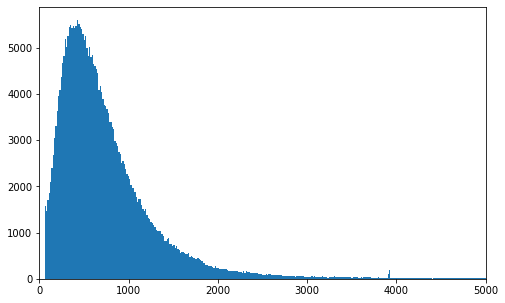

In [450]:
binsize = 15
print(binsize)
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xlim([0,5000])
plt.show()

The graph has a long tail, so transfer it in log form

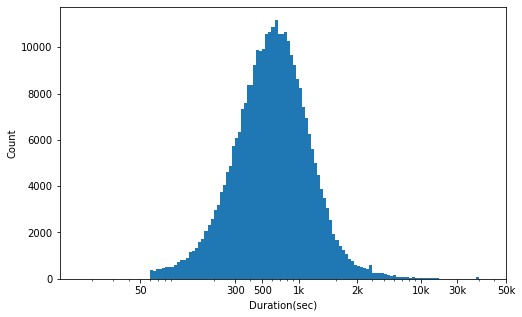

In [481]:
log_binsize = 0.025
bins = 10 ** np.arange(1.2, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([50,300,500,1000,3000,10000,20000,50000], ['50', '300', '500', '1k', '2k', '10k','30k','50k'])
plt.xlabel('Duration(sec)')
plt.ylabel('Count')
plt.show()

The distribution looks like normal distribution now, it can be seen that the most common duration is about 300 to 1000 secs, which about 5mins to 16.67 mins.


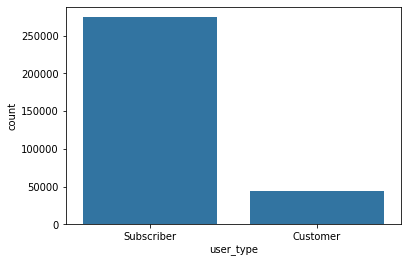

In [491]:
sb.countplot(data = df, x = 'user_type',color = sb.color_palette()[0] )

Observation: There are more subscribers than customers

Let's explore which time in a day has more riders

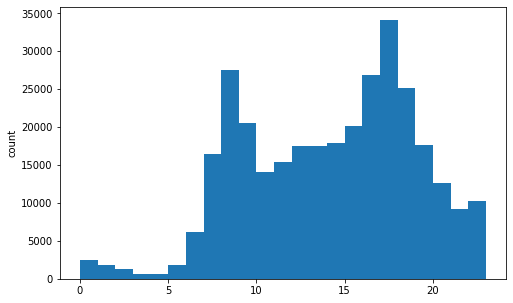

In [483]:
#plot one day start_time
binsize = 0.1
bins = np.arange(0, 24, 1)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'hour', bins = bins)
plt.ylabel('count')
plt.show()

We could find there is a peak around 18pm, so 18pm is the time in a day has most riders. Also, there is a second peak : 9am, also have a lot bike riders, but it is lower than 18m.

Count app method and clipper method users

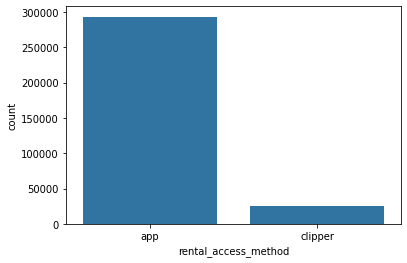

In [479]:
sb.countplot(data = df, x = 'rental_access_method',color = sb.color_palette()[0] )

There are more riders prefer using app rather than clipper. 

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The duration varible took a large number of values and has a long tail, so I used a log transform. The data looks normal distribution, with the peak between 300 to 1000secs.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I only extract the hour from the datetime to make a general start_time to estimate, so the graph is more clearly. I caculate the duration mean for the customer and subsriber to make a comparsion.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [461]:
num_vars = ['duration_sec', 'hour', 'end_time', 'start_station_id', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_latitude',
'end_station_longitude']

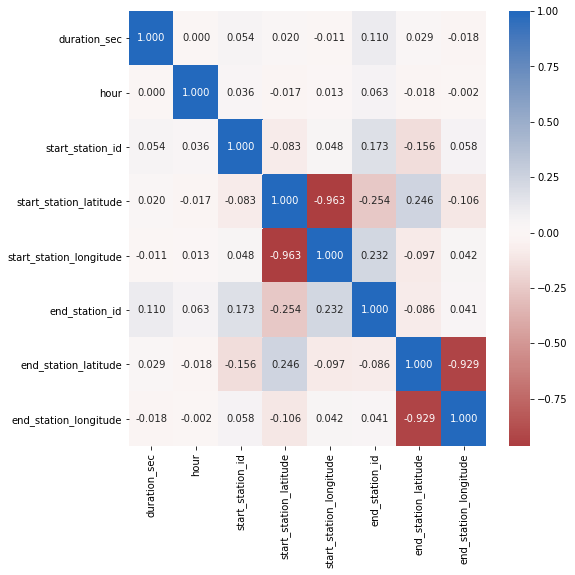

In [462]:
plt.figure(figsize = [8, 8])
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)

As can be seen from the graph,there is no strong correlation between varibles that we are interested in. The graph indicated that start_sation_longitude and start_station_latitude have a strong correlation; end_station_longitude and end_station_latitude also have strong correlation .

In [463]:
numeric_vars = ['duration_sec','hour']

To start off with, I investigate relationships between  duration_sec and hour through a pairgrid.

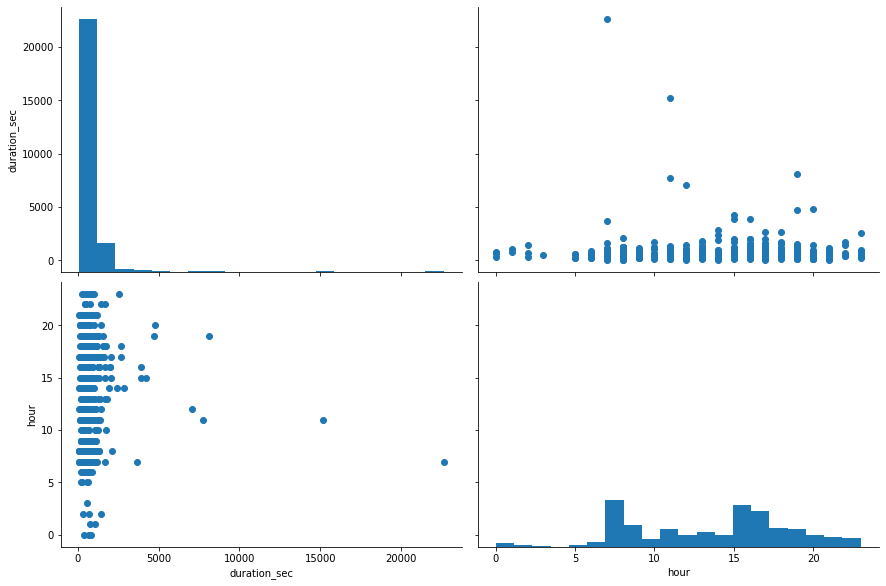

In [464]:
samples = np.random.choice(df.shape[0], 500, replace = False)
samp = df.iloc[samples,:]

g = sb.PairGrid(data = samp, vars = numeric_vars, height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

As can be seen from the scatter plot, there is no postive or negative relationship between duration_sec and hour. However, there are more dots around 15pm to 18pm, also shows a relative longer duration during those time period.

Let's check if other features are related

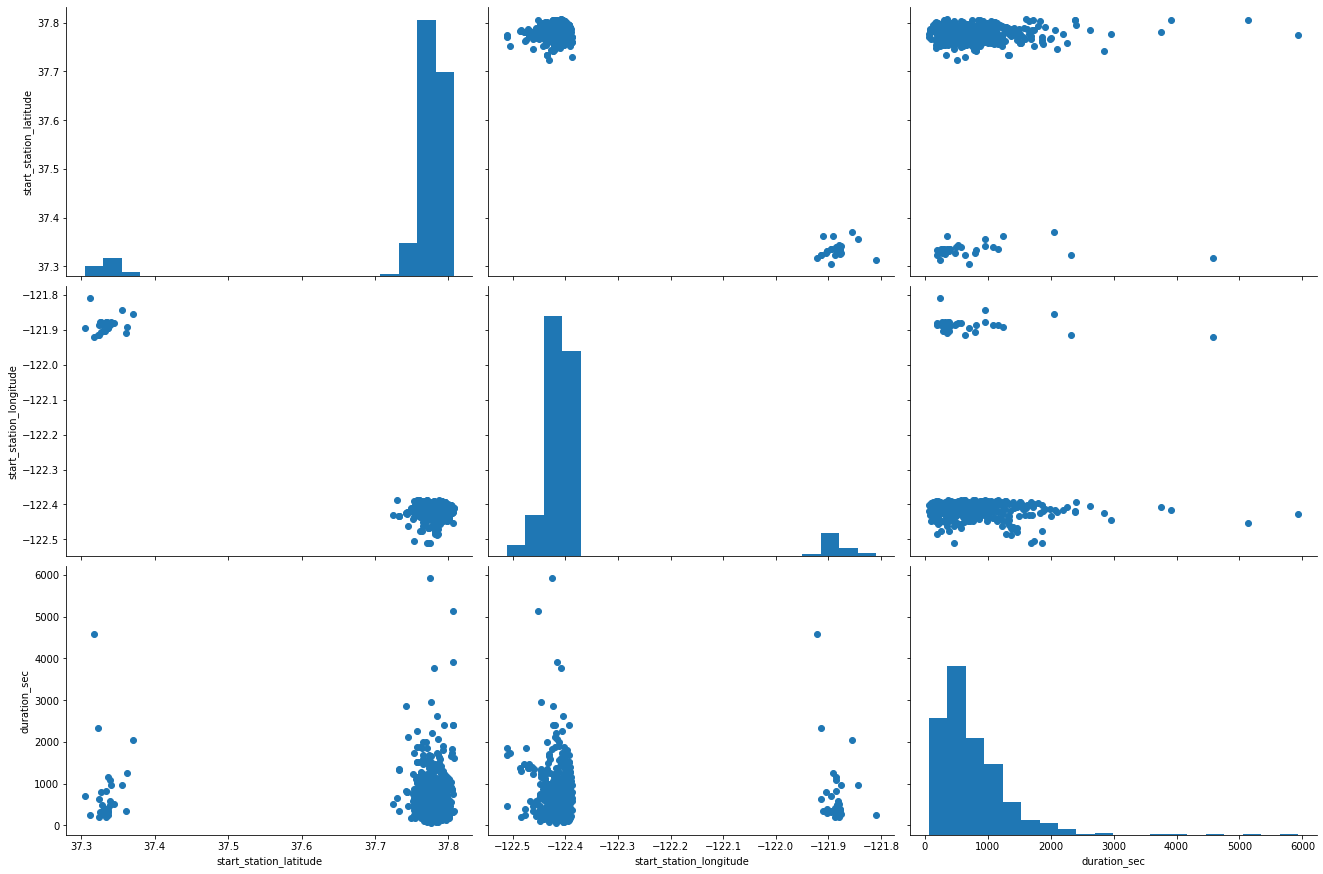

In [465]:
numeric_vars2 = ['start_station_latitude','start_station_longitude','duration_sec']
samples = np.random.choice(df.shape[0], 500, replace = False)
samp = df.iloc[samples,:]

g = sb.PairGrid(data = samp, vars = numeric_vars2, height = 4, aspect = 1.5)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

There is no linear relation between
'start_station_latitude',
'start_station_longitude',
'duration_sec'.
It looks like most lower duration_sec is likely to have lower start_station_longitude and higher start_station latitude.

Let's plot a matrix of numeric features against categorical features.

In [466]:
categoric_vars1 = ['user_type', 'hour','rental_access_method']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/axisgrid.py:1259: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


<Figure size 2160x3600 with 0 Axes>

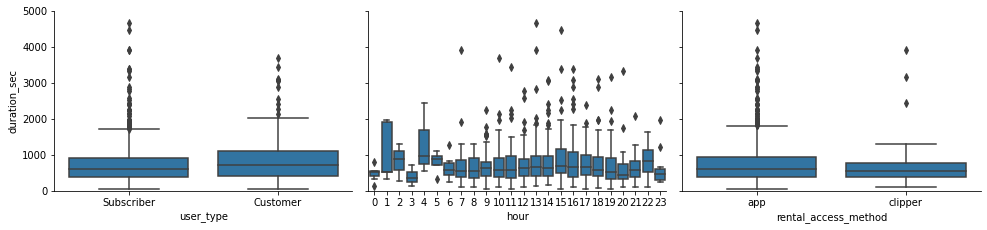

In [468]:
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [30, 50])
g = sb.PairGrid(data = df_samp, y_vars = ['duration_sec'], x_vars = categoric_vars1,
                size = 3, aspect = 1.5)
plt.ylim(0,5000)
g.map(boxgrid)
plt.show();

<p>There are three observations:
<p>1.Customer has longer duration_sec on average
<p>2.Riders who start at around 4:00 am has longer duration_sec on average,
<p>  Riders who start at 1:00am has a large duration range.
<p>3.Using App methond has a little higher duration_sec than dipper user on average.


<p>let's figure out each one more
<p> Compare customers and subscriber through duration_sec

In [487]:
#caculate the mean of each user_type
df_users = df.groupby('user_type')['duration_sec'].mean()
df_users

user_type
Customer      1101.777694
Subscriber     735.565437
Name: duration_sec, dtype: float64

In [488]:
df_customer_sec = df.query('user_type == "Customer"')
customer_sec = df_customer_sec['duration_sec'].mean()
df_subscriber_sec = df.query('user_type == "Subscriber"')
subscriber_sec = df_subscriber_sec['duration_sec'].mean()

<BarContainer object of 2 artists>

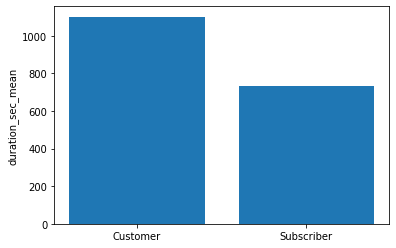

In [489]:
# plot bar chart
locations = [1,2]
heights = [customer_sec,subscriber_sec]
labels =['Customer','Subscriber']
plt.ylabel('duration_sec_mean')
plt.bar(locations,heights,tick_label = labels)

From the bar chart, Customers have longer duration than Subscriber on average

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

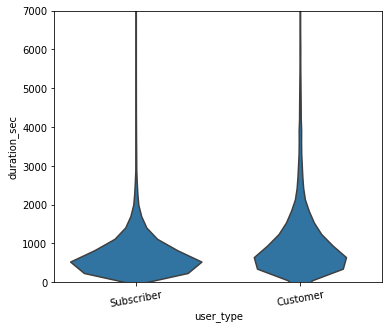

In [469]:
plt.figure(figsize = [20, 5])
base_color = sb.color_palette()[0]

# left plot: violin plot
plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'user_type', y = 'duration_sec', inner = None,
              color = base_color)
plt.ylim(0,7000)
plt.xticks(rotation = 10) 

<p>As can be seen from the graph,The distrbution for customer is much more peaked. Both Customers and Subscribers have some outliners. There are more subscribers have travel duration below 1000 seconds,however, more customers have travel duration between 1000 to 2000 than subscribers.

plot to see relationship between duration and hour

(0.0, 5000.0)

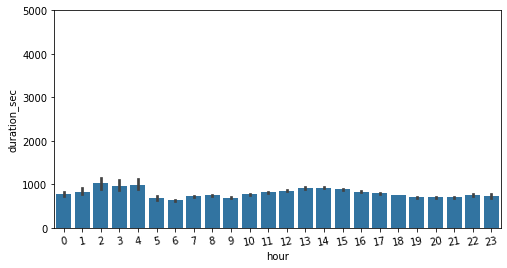

In [470]:
plt.figure(figsize = [8, 4])
base_color = sb.color_palette()[0]

sb.barplot(data = df, x = 'hour', y = 'duration_sec', color = base_color)
plt.xticks(rotation = 10)
plt.ylim(0,5000)


<p>As can be seen from the graph, the black lines in 2am,3am,4am are longer than others, it indicates more uncertainty in those periods. The reason may be not enough samples in those periods.
<p> We also can find that 11am,12am,13pm also have a relative long travel durations.

let's use a scatterplot to see if hour and duration_sec are related

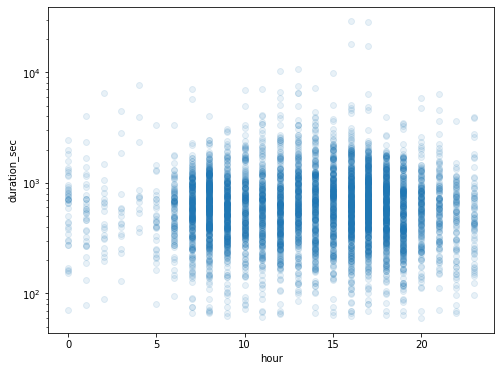

In [471]:
# hour vs.duration_sec
samples = np.random.choice(df.shape[0], 5000, replace = False)
samp = df.iloc[samples,:]

plt.figure(figsize = [8, 6]);
plt.scatter(data = samp, x = 'hour', y = 'duration_sec', alpha = 1/10);
plt.xlabel('hour');
plt.yscale('log');
plt.ylabel('duration_sec');


There is no postive or negative relation between duration_sec and hour varible,however, we can see the dense area is in 5am to 18pm, and duration is about 300 to 1000.

Let's use a violinplot to compare app user and clipper user's durations.

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

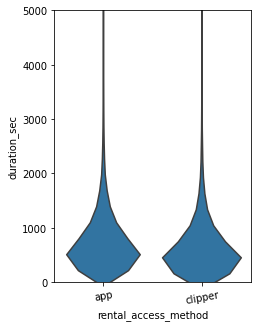

In [474]:
# rental_access_method vs.duration_sec
plt.figure(figsize = [12, 5])
base_color = sb.color_palette()[0]

plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'rental_access_method', y = 'duration_sec', inner = None,
              color = base_color)
plt.ylim(0,5000)
plt.xticks(rotation = 10) 

 Around 500 secs, a little bit more users use clipper method than app;however, in general, there is no big differences between app and clipper regarding the duration_sec

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

  <p>1.On average, Customer has longer duration_sec. More specifically, there are more subscribers have travel duration below 1000 seconds,however, more customers have travel duration between 1000 to 5000. Thus,subscribers are more likely to have a shorter duration trip.

  <p>2.Riders who start at around 4:00 am has longest duration_sec on average,
 Riders who start at 1:00am have a large duration range.The most dense area is from 15pm to 18pm, and duration is about 300 to 1000 secs.

  <p>3.Using App methond has a little bit higher duration_sec than dipper user on average.In general, there is no big differences between app and clipper regarding the duration_sec

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Start_sation_longitude and start_station_latitude have a strong correlation; end_station_longitude and end_station_latitude also have strong correlation. Also, It looks like most lower duration_sec is likely to have lower start_station_longitude and higher start_station latitude.

## Multivariate Exploration



Let's find compare User_type by hour & Duration_sec 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


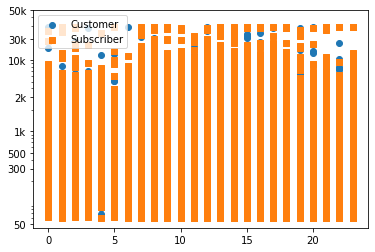

In [475]:
#User_type vs hour vs duration_sec
cat_markers = [['Customer', 'o'],
               ['Subscriber', 's']]

for cat, marker in cat_markers:
    df_user = df[df['user_type'] == cat]
    plt.scatter(data = df_user, x = 'hour', y = 'duration_sec', marker = marker)
    plt.yscale('log')
    plt.yticks([50,300,500,1000,3000,10000,20000,50000], ['50', '300', '500', '1k', '2k', '10k','30k','50k'])
plt.legend(['Customer','Subscriber'])

<p>The graph contains a lot overlapping, it is not helpful to figure out.
<p>Let's plot another one to see

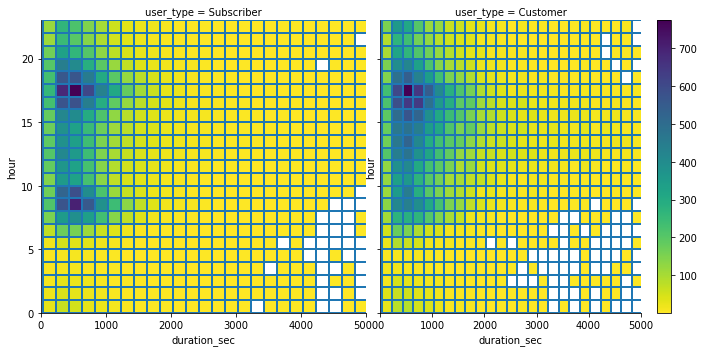

In [476]:
xbin_edges = np.arange(30, df['duration_sec'].max()+ 200, 200)
ybin_edges = np.arange(0, df['hour'].max()+1, 1)

# plot the data using the calculated weights
g = sb.FacetGrid(data = df,col = 'user_type',height =5)
g.map(plt.hist2d,'duration_sec','hour',
      bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5)

plt.xlim(0,5000)
plt.xlabel('duration_sec')
plt.ylabel('hour');
plt.colorbar();

<p>1.Most Subscribers'duration are between 400 to 1000 secs and the time is in the morning around 9 am and in the evening between 16pm to 19pm.
<p>2.Most customers' duration are between 400 to 1000 secs and the time is very similar to Customers, but is not as dense as Customers. 

Let's see relation between User_type and rental method by duration_sec

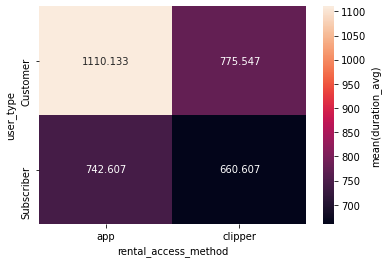

In [477]:
#User_type vs rental method vs duration_sec
cat_means = df.groupby(['user_type', 'rental_access_method']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_avg')
cat_means = cat_means.pivot(index = 'user_type', columns = 'rental_access_method',
                            values = 'duration_avg')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(duration_avg)'})

<p>Customers who use App have highest duration_avg.
<p>Subscribers who use clipper have lowest duration_avg.

Let's find compare Rental method by hour & Duration_sec 

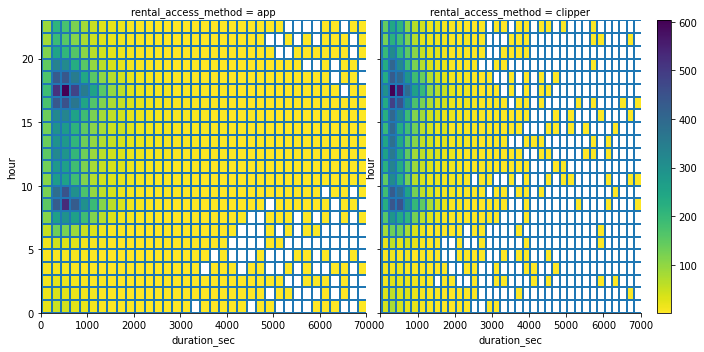

In [478]:
# duration & hour & rental methods
xbin_edges = np.arange(30, df['duration_sec'].max()+ 200, 200)
ybin_edges = np.arange(0, df['hour'].max()+1, 1)

# plot the data using the calculated weights
g = sb.FacetGrid(data = df,col = 'rental_access_method',height =5)
g.map(plt.hist2d,'duration_sec','hour',
      bins = [xbin_edges, ybin_edges], cmap = 'viridis_r', cmin = 0.5)

plt.xlim(0,7000)
plt.xlabel('duration_sec')
plt.ylabel('hour');
plt.colorbar();

 The location of dark color area is very similar: the time of both rental method is around 8 -10am, 16-18pm, and duration is about 300 to 1000 secs.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> <p>1.Most Subscribers'duration are between 400 to 1000 secs and the time is in the morning around 9 am and in the evening between 16pm to 19pm.
  <p>2.Most customers' duration are between 400 to 1000 secs and the time is very similar to Customers, but is not as dense as Customers. 
  <p>3.Customers who use App have highest duration_avg.
  <p>4.Subscribers who use clipper have lowest duration_avg.
  <p>5.Most APP users and clipper users duration is between 300 to 1000 secs and the time is in the morning around 9 am and in the evening between 16pm to 18pm.

### Were there any interesting or surprising interactions between features?

> When comparing app and clipper,the findings of duration and hour are very similar to customers and subscribers'.